<a href="https://colab.research.google.com/github/harshit089/ML_AI_HACKATHON-24/blob/main/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
harshittomar089_dataset_path = kagglehub.dataset_download('harshittomar089/dataset')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/Train.csv
/kaggle/input/dataset/Test.csv


In [ ]:
train_df = pd.read_csv("/kaggle/input/dataset/Train.csv")


In [ ]:
train_df.head(5)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,CpuName,CpuNumberOfCores,CpuNumberOfThreads,CpuBaseClock,CpuCacheL1,CpuCacheL2,CpuCacheL3,CpuDieSize,CpuFrequency,CpuMultiplier,...,GpuNumberOfShadingUnits,GpuNumberOfTMUs,GpuTextureRate,GpuNumberOfTransistors,GpuVulkan,GameName,GameResolution,GameSetting,Dataset,FPS
0,b'Intel Core i7-7700K',4.0,8.0,100.0,256.0,1024.0,8.0,NaN,4200.0,42.0,...,3584.0,224.0,354400.0,11800.0,b'1.2.131',b'counterStrikeGlobalOffensive',1080.0,b'max',b'userbenchmark',300.0
1,b'AMD Ryzen 7 1800X',8.0,16.0,100.0,768.0,4096.0,16.0,0.000192,3600.0,36.0,...,3584.0,224.0,354400.0,11800.0,b'1.2.131',b'counterStrikeGlobalOffensive',1080.0,b'high',b'userbenchmark',300.0
2,b'Intel Core i7-9700K',8.0,8.0,100.0,512.0,2048.0,12.0,NaN,3600.0,36.0,...,768.0,48.0,66820.0,3300.0,b'1.2.131',b'fortnite',1080.0,b'high',b'userbenchmark',90.0
3,b'Intel Core i5-5200U',2.0,4.0,100.0,128.0,512.0,3.0,NaN,2200.0,22.0,...,192.0,24.0,22800.0,NaN,b'1.1.80',b'counterStrikeGlobalOffensive',720.0,b'low',b'userbenchmark',30.0
4,b'Intel Core i7-5500U',2.0,4.0,100.0,128.0,512.0,4.0,NaN,2400.0,24.0,...,640.0,40.0,44960.0,1870.0,b'1.1.126',b'grandTheftAuto5',720.0,b'low',b'userbenchmark',0.0


In [ ]:
train_df.columns
train_df.shape

(383249, 45)

In [ ]:
missing_counts = train_df.isnull().sum()
missing_pct = (missing_counts / len(train_df)) * 100
missing_summary = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct": missing_pct,
    "dtype": train_df.dtypes
}).sort_values("missing_pct", ascending=False)

print("Missing Value Summary:")
print(missing_summary[missing_summary["missing_count"] > 0])

Missing Value Summary:
                           missing_count  missing_pct    dtype
GpuNumberOfExecutionUnits         371680    96.981336  float64
GpuNumberOfComputeUnits           321330    83.843663  float64
CpuNumberOfTransistors            203305    53.047757  float64
CpuDieSize                        182169    47.532805  float64
GpuMemorySize                      13852     3.614360  float64
GpuBandwidth                       13852     3.614360  float64
GpuMemoryBus                       13852     3.614360  float64
GpuNumberOfTransistors             10345     2.699289  float64
GpuDieSize                         10045     2.621011  float64
CpuCacheL3                          4548     1.186696  float64
GpuFP32Performance                    53     0.013829  float64
GpuNumberOfShadingUnits               53     0.013829  float64


In [ ]:
#Logic for handling missing values

drop_threshold = 0.8

# 3. Drop columns with too many missing values(>80%)
to_drop = missing_summary[missing_summary["missing_pct"] > drop_threshold*100].index
train_df = train_df.drop(columns=to_drop)


In [ ]:
train_df.columns
train_df.shape

(383249, 43)

In [ ]:
for col in train_df.select_dtypes(include=[np.number]).columns:
    if train_df[col].isnull().sum() > 0:
        train_df[col] = train_df[col].fillna(train_df[col].median())


🎯 Analyzing Target Variable (FPS) Distribution...


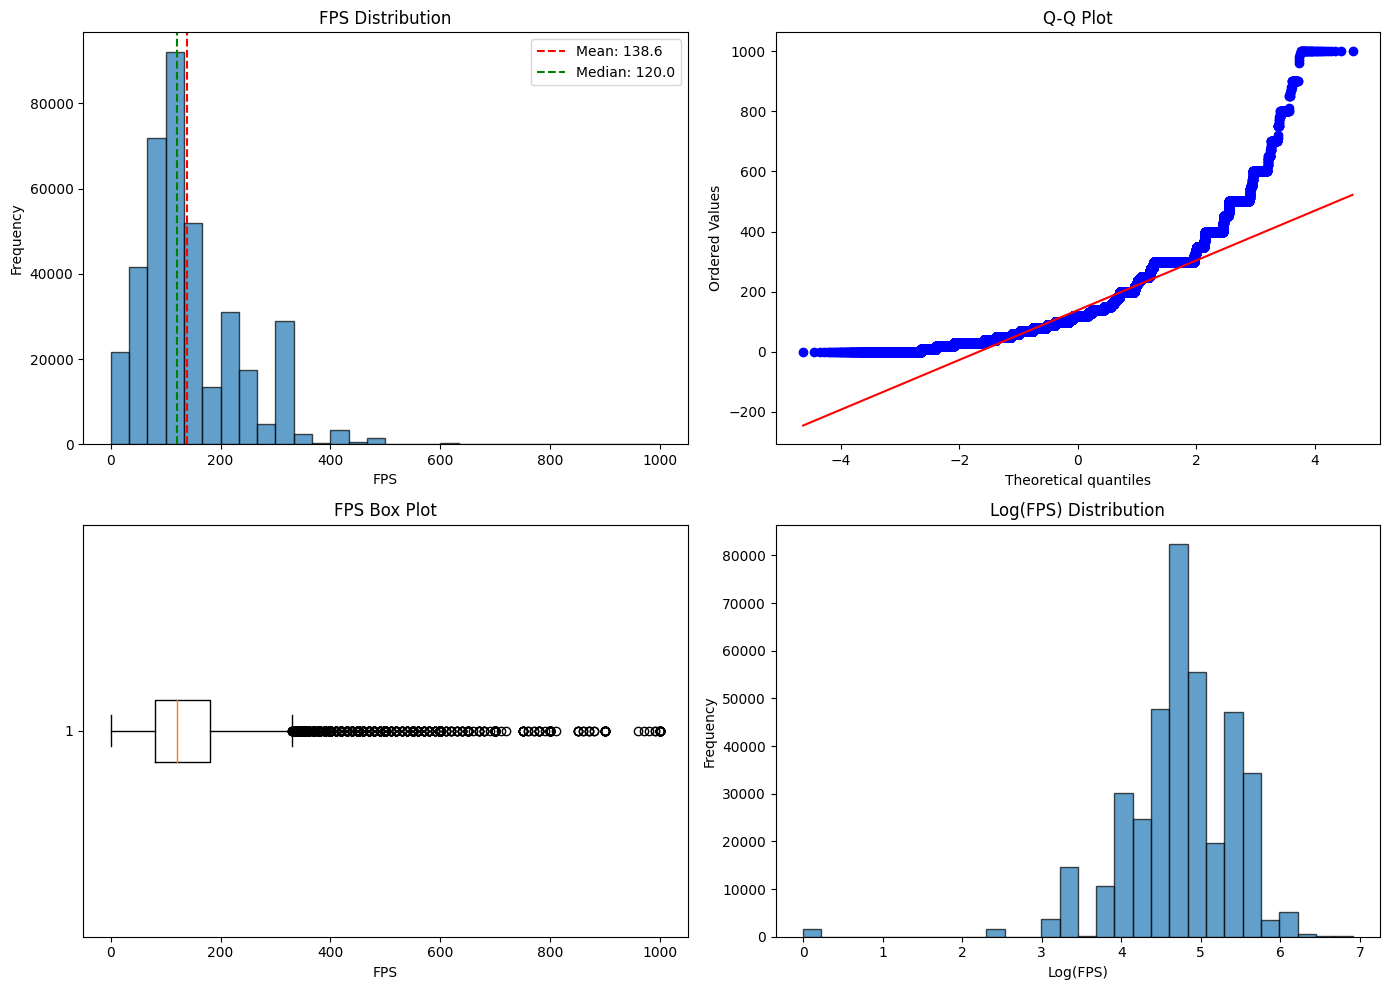

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
print("\n🎯 Analyzing Target Variable (FPS) Distribution...")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram
axes[0, 0].hist(train_df['FPS'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('FPS Distribution')
axes[0, 0].set_xlabel('FPS')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(train_df['FPS'].mean(), color='red', linestyle='--', label=f'Mean: {train_df["FPS"].mean():.1f}')
axes[0, 0].axvline(train_df['FPS'].median(), color='green', linestyle='--', label=f'Median: {train_df["FPS"].median():.1f}')
axes[0, 0].legend()


from scipy import stats
from scipy.stats import shapiro, normaltest, pearsonr, spearmanr

# QQ Plot
stats.probplot(train_df['FPS'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot')

# Box Plot
axes[1, 0].boxplot(train_df['FPS'], vert=False)
axes[1, 0].set_xlabel('FPS')
axes[1, 0].set_title('FPS Box Plot')

# Log-transformed distribution
log_fps = np.log1p(train_df['FPS'])
axes[1, 1].hist(log_fps, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Log(FPS) Distribution')
axes[1, 1].set_xlabel('Log(FPS)')
axes[1, 1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

In [ ]:
# Normality test
stat, p = shapiro(train_df["FPS"])
print(f"Shapiro-Wilk p-value: {p}")
if p < 0.05:
    print("Reject normality → FPS is not normally distributed")

Shapiro-Wilk p-value: 7.29086919038828e-143
Reject normality → FPS is not normally distributed


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 383249.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
train_df["FPS"]

0         300.0
1         300.0
2          90.0
3          30.0
4           0.0
          ...  
383244     60.0
383245     51.0
383246    110.0
383247    100.0
383248     60.0
Name: FPS, Length: 383249, dtype: float64

In [ ]:
# Yeo-Johnson transform (works with zero/negative):
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson")
train_df["FPS_yj"] = pt.fit_transform(train_df[["FPS"]])

In [ ]:
train_df.shape

(383249, 44)

In [ ]:
from scipy.stats import pearsonr, spearmanr, f_oneway, kruskal

# Correlation for numeric features
numeric_cols = train_df.select_dtypes(include=[np.number]).drop(columns=["FPS"]).columns
for col in numeric_cols:
    corr, _ = spearmanr(train_df[col], train_df["FPS"], nan_policy="omit")
    print(f"{col}: Spearman Corr = {corr:.3f}")

# ANOVA/Kruskal for categorical
categorical_cols = train_df.select_dtypes(exclude=[np.number]).columns
for col in categorical_cols:
    groups = [train_df.loc[train_df[col] == cat, "FPS"].dropna() for cat in train_df[col].dropna().unique()]
    if len(groups) > 1:
        stat, p = f_oneway(*groups)  # or use kruskal(*groups)
        print(f"{col}: ANOVA p-value = {p:.3e}")


CpuNumberOfCores: Spearman Corr = 0.192
CpuNumberOfThreads: Spearman Corr = 0.235
CpuBaseClock: Spearman Corr = -0.210
CpuCacheL1: Spearman Corr = 0.178
CpuCacheL2: Spearman Corr = 0.077
CpuCacheL3: Spearman Corr = 0.242
CpuDieSize: Spearman Corr = 0.011
CpuFrequency: Spearman Corr = 0.269
CpuMultiplier: Spearman Corr = 0.335
CpuProcessSize: Spearman Corr = -0.250
CpuTDP: Spearman Corr = 0.175
CpuNumberOfTransistors: Spearman Corr = 0.158
CpuTurboClock: Spearman Corr = 0.344
GpuBandwidth: Spearman Corr = 0.313
GpuBaseClock: Spearman Corr = 0.364
GpuBoostClock: Spearman Corr = 0.350
GpuDieSize: Spearman Corr = 0.237
GpuFP32Performance: Spearman Corr = 0.395
GpuMemoryBus: Spearman Corr = 0.177
GpuMemorySize: Spearman Corr = 0.332
GpuPixelRate: Spearman Corr = 0.420
GpuProcessSize: Spearman Corr = -0.097
GpuNumberOfROPs: Spearman Corr = 0.403
GpuNumberOfShadingUnits: Spearman Corr = 0.350
GpuNumberOfTMUs: Spearman Corr = 0.340
GpuTextureRate: Spearman Corr = 0.390
GpuNumberOfTransistors: 

In [ ]:
from scipy.stats import spearmanr, f_oneway

target = "FPS"

# --- Numeric features ---
numeric_cols = train_df.select_dtypes(include=[np.number]).drop(columns=[target]).columns
selected_numeric = []
for col in numeric_cols:
    corr, _ = spearmanr(train_df[col], train_df[target], nan_policy="omit")
    if abs(corr) >= 0.1:     # keep only meaningful correlation
        selected_numeric.append(col)

# --- Categorical features ---
categorical_cols = train_df.select_dtypes(exclude=[np.number]).columns
selected_categorical = []
for col in categorical_cols:
    groups = [train_df.loc[train_df[col] == cat, target].dropna() for cat in train_df[col].dropna().unique()]
    if len(groups) > 1:
        stat, p = f_oneway(*groups)
        if p <= 0.05:       # keep only significant groups
            selected_categorical.append(col)

# --- Final keep list ---
selected_features = selected_numeric + selected_categorical + [target]

# --- Shrink dataframe in place ---
train_df = train_df[selected_features]

print("✅ Final feature set:", selected_features)


✅ Final feature set: ['CpuNumberOfCores', 'CpuNumberOfThreads', 'CpuBaseClock', 'CpuCacheL1', 'CpuCacheL3', 'CpuFrequency', 'CpuMultiplier', 'CpuProcessSize', 'CpuTDP', 'CpuNumberOfTransistors', 'CpuTurboClock', 'GpuBandwidth', 'GpuBaseClock', 'GpuBoostClock', 'GpuDieSize', 'GpuFP32Performance', 'GpuMemoryBus', 'GpuMemorySize', 'GpuPixelRate', 'GpuNumberOfROPs', 'GpuNumberOfShadingUnits', 'GpuNumberOfTMUs', 'GpuTextureRate', 'GpuNumberOfTransistors', 'GameResolution', 'FPS_yj', 'CpuName', 'CpuMultiplierUnlocked', 'GpuName', 'GpuArchitecture', 'GpuBus nterface', 'GpuDirectX', 'GpuMemoryType', 'GpuOpenCL', 'GpuOpenGL', 'GpuShaderModel', 'GpuVulkan', 'GameName', 'GameSetting', 'Dataset', 'FPS']


In [ ]:
train_df["FPS_yj"]

0         1.629983
1         1.629983
2        -0.442215
3        -1.720975
4        -3.748310
            ...   
383244   -0.971097
383245   -1.163373
383246   -0.152310
383247   -0.292454
383248   -0.971097
Name: FPS_yj, Length: 383249, dtype: float64

In [ ]:
print(train_df.columns)


Index(['CpuNumberOfCores', 'CpuNumberOfThreads', 'CpuBaseClock', 'CpuCacheL1',
       'CpuCacheL3', 'CpuFrequency', 'CpuMultiplier', 'CpuProcessSize',
       'CpuTDP', 'CpuNumberOfTransistors', 'CpuTurboClock', 'GpuBandwidth',
       'GpuBaseClock', 'GpuBoostClock', 'GpuDieSize', 'GpuFP32Performance',
       'GpuMemoryBus', 'GpuMemorySize', 'GpuPixelRate', 'GpuNumberOfROPs',
       'GpuNumberOfShadingUnits', 'GpuNumberOfTMUs', 'GpuTextureRate',
       'GpuNumberOfTransistors', 'GameResolution', 'FPS_yj', 'CpuName',
       'CpuMultiplierUnlocked', 'GpuName', 'GpuArchitecture',
       'GpuBus nterface', 'GpuDirectX', 'GpuMemoryType', 'GpuOpenCL',
       'GpuOpenGL', 'GpuShaderModel', 'GpuVulkan', 'GameName', 'GameSetting',
       'Dataset', 'FPS'],
      dtype='object')


In [ ]:

# Select numeric features (after correlation/ANOVA filtering)
numeric_features = train_df.select_dtypes(include=[np.number]).drop(columns=["FPS"]).columns

# ---- Step 3a: Correlation matrix ----
corr_matrix = train_df[numeric_features].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Drop features with high correlation (> 0.85)
to_drop_corr = [col for col in upper.columns if any(upper[col] > 0.85)]
numeric_features = [col for col in numeric_features if col not in to_drop_corr]

print("Dropped due to high correlation:", to_drop_corr)

Dropped due to high correlation: ['GpuBoostClock', 'GpuFP32Performance', 'GpuMemorySize', 'GpuPixelRate', 'GpuNumberOfROPs', 'GpuNumberOfShadingUnits', 'GpuNumberOfTMUs', 'GpuTextureRate', 'GpuNumberOfTransistors']


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [ ]:
train_df = train_df.drop(columns=to_drop_corr)

print("✅ train_df shape after dropping correlated features:", train_df.shape)

✅ train_df shape after dropping correlated features: (383249, 32)


In [ ]:
train_df.head(5)

,CpuNumberOfCores,CpuNumberOfThreads,CpuBaseClock,CpuCacheL1,CpuCacheL3,CpuFrequency,CpuMultiplier,CpuProcessSize,CpuTDP,CpuNumberOfTransistors,...,GpuDirectX,GpuMemoryType,GpuOpenCL,GpuOpenGL,GpuShaderModel,GpuVulkan,GameName,GameSetting,Dataset,FPS
0,4.0,8.0,100.0,256.0,8.0,4200.0,42.0,14.0,91.0,1400.0,...,b'12',b'GDDR5X',b'1.2',b'4.6',b'6.4',b'1.2.131',b'counterStrikeGlobalOffensive',b'max',b'userbenchmark',300.0
1,8.0,16.0,100.0,768.0,16.0,3600.0,36.0,14.0,95.0,4800.0,...,b'12',b'GDDR5X',b'1.2',b'4.6',b'6.4',b'1.2.131',b'counterStrikeGlobalOffensive',b'high',b'userbenchmark',300.0
2,8.0,8.0,100.0,512.0,12.0,3600.0,36.0,14.0,95.0,1400.0,...,b'12',b'GDDR5',b'1.2',b'4.6',b'6.4',b'1.2.131',b'fortnite',b'high',b'userbenchmark',90.0
3,2.0,4.0,100.0,128.0,3.0,2200.0,22.0,14.0,15.0,1400.0,...,b'12',b'?',b'2',b'4.4',b'5.1',b'1.1.80',b'counterStrikeGlobalOffensive',b'low',b'userbenchmark',30.0
4,2.0,4.0,100.0,128.0,4.0,2400.0,24.0,14.0,15.0,1400.0,...,b'12',b'DDR3',b'1.2',b'4.6',b'5.1',b'1.1.126',b'grandTheftAuto5',b'low',b'userbenchmark',0.0


In [ ]:
print(train_df.columns)

Index(['CpuNumberOfCores', 'CpuNumberOfThreads', 'CpuBaseClock', 'CpuCacheL1',
       'CpuCacheL3', 'CpuFrequency', 'CpuMultiplier', 'CpuProcessSize',
       'CpuTDP', 'CpuNumberOfTransistors', 'CpuTurboClock', 'GpuBandwidth',
       'GpuBaseClock', 'GpuDieSize', 'GpuMemoryBus', 'GameResolution',
       'FPS_yj', 'CpuName', 'CpuMultiplierUnlocked', 'GpuName',
       'GpuArchitecture', 'GpuBus nterface', 'GpuDirectX', 'GpuMemoryType',
       'GpuOpenCL', 'GpuOpenGL', 'GpuShaderModel', 'GpuVulkan', 'GameName',
       'GameSetting', 'Dataset', 'FPS'],
      dtype='object')


In [ ]:
train_df.shape

(383249, 32)

In [ ]:
from sklearn.model_selection import train_test_split
#50% train, 50% temp
train_data, temp_data = train_test_split(train_df, test_size=0.5, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.4, random_state=42)
print(f"Train size: {len(train_data)} ({len(train_data)/len(train_df):.2%})")
print(f"Validation size: {len(val_data)} ({len(val_data)/len(train_df):.2%})")
print(f"Test size: {len(test_data)} ({len(test_data)/len(train_df):.2%})")

Train size: 191624 (50.00%)
Validation size: 114975 (30.00%)
Test size: 76650 (20.00%)


In [ ]:
print(train_df.columns)

Index(['CpuNumberOfCores', 'CpuNumberOfThreads', 'CpuBaseClock', 'CpuCacheL1',
       'CpuCacheL3', 'CpuFrequency', 'CpuMultiplier', 'CpuProcessSize',
       'CpuTDP', 'CpuNumberOfTransistors', 'CpuTurboClock', 'GpuBandwidth',
       'GpuBaseClock', 'GpuDieSize', 'GpuMemoryBus', 'GameResolution',
       'FPS_yj', 'CpuName', 'CpuMultiplierUnlocked', 'GpuName',
       'GpuArchitecture', 'GpuBus nterface', 'GpuDirectX', 'GpuMemoryType',
       'GpuOpenCL', 'GpuOpenGL', 'GpuShaderModel', 'GpuVulkan', 'GameName',
       'GameSetting', 'Dataset', 'FPS'],
      dtype='object')


In [ ]:
for df in [train_data, val_data, test_data]:
    # CPU engineered features
    df["CPU_throughput_base"] = df["CpuNumberOfCores"] * df["CpuBaseClock"]
    df["CPU_throughput_turbo"] = df["CpuNumberOfCores"] * df["CpuTurboClock"]
    df["CPU_cache_total"] = df["CpuCacheL1"] + df["CpuCacheL3"]
    df["CPU_parallel_power"] = df["CpuFrequency"] * df["CpuNumberOfThreads"]
    df["CPU_efficiency"] = df["CpuTDP"] / (df["CpuProcessSize"] + 1e-5)

    # GPU engineered features
    df["GPU_memory_speed"] = df["GpuBandwidth"] * df["GpuBaseClock"]
    df["GPU_mem_throughput"] = df["GpuMemoryBus"] * df["GpuBandwidth"]

    # CPU–GPU balance
    df["CPU_GPU_balance"] = df["CPU_throughput_base"] / (df["GpuBandwidth"] + 1e-5)
    df["Cache_GPU_ratio"] = df["CpuCacheL3"] / (df["GpuBandwidth"] + 1e-5)

In [ ]:
train_data.head(5)

,CpuNumberOfCores,CpuNumberOfThreads,CpuBaseClock,CpuCacheL1,CpuCacheL3,CpuFrequency,CpuMultiplier,CpuProcessSize,CpuTDP,CpuNumberOfTransistors,...,FPS,CPU_throughput_base,CPU_throughput_turbo,CPU_cache_total,CPU_parallel_power,CPU_efficiency,GPU_memory_speed,GPU_mem_throughput,CPU_GPU_balance,Cache_GPU_ratio
239244,4.0,4.0,100.0,256.0,6.0,3000.0,30.0,14.0,65.0,1400.0,...,60.0,400.0,14000.0,262.0,12000.0,4.642854,117067200.0,8073600.0,0.004756,0.000071
288979,4.0,8.0,100.0,256.0,8.0,4000.0,40.0,14.0,95.0,1400.0,...,280.0,400.0,16800.0,264.0,32000.0,6.785709,385987800.0,65612800.0,0.001561,0.000031
203188,8.0,16.0,100.0,768.0,16.0,3400.0,34.0,14.0,95.0,4800.0,...,102.6,800.0,30400.0,784.0,54400.0,6.785709,831600000.0,216832000.0,0.001299,0.000026
22891,4.0,8.0,100.0,256.0,8.0,3500.0,35.0,22.0,77.0,1400.0,...,70.0,400.0,15600.0,264.0,28000.0,3.499998,385987800.0,65612800.0,0.001561,0.000031
45769,4.0,8.0,133.0,256.0,8.0,2800.0,21.0,45.0,95.0,774.0,...,50.0,532.0,13864.0,264.0,22400.0,2.111111,80179200.0,11059200.0,0.006157,0.000093


In [ ]:

# Identify categorical features
categorical_features = train_data.select_dtypes(exclude=[np.number]).columns

# Create a copy to avoid modifying original
train_encoded = train_data.copy()

# Target encoding for each categorical column
target_encoders = {}

for col in categorical_features:
    # Compute mean FPS per category (using only training set)
    mapping = train_encoded.groupby(col)["FPS"].mean().to_dict()
    target_encoders[col] = mapping

    # Replace categories with their mean FPS
    train_encoded[col] = train_encoded[col].map(mapping)

print("Applied target encoding for:", list(categorical_features))

Applied target encoding for: ['CpuName', 'CpuMultiplierUnlocked', 'GpuName', 'GpuArchitecture', 'GpuBus nterface', 'GpuDirectX', 'GpuMemoryType', 'GpuOpenCL', 'GpuOpenGL', 'GpuShaderModel', 'GpuVulkan', 'GameName', 'GameSetting', 'Dataset']


In [ ]:
train_encoded.shape

(191624, 41)

In [ ]:
train_encoded.head(5)

,CpuNumberOfCores,CpuNumberOfThreads,CpuBaseClock,CpuCacheL1,CpuCacheL3,CpuFrequency,CpuMultiplier,CpuProcessSize,CpuTDP,CpuNumberOfTransistors,...,FPS,CPU_throughput_base,CPU_throughput_turbo,CPU_cache_total,CPU_parallel_power,CPU_efficiency,GPU_memory_speed,GPU_mem_throughput,CPU_GPU_balance,Cache_GPU_ratio
239244,4.0,4.0,100.0,256.0,6.0,3000.0,30.0,14.0,65.0,1400.0,...,60.0,400.0,14000.0,262.0,12000.0,4.642854,117067200.0,8073600.0,0.004756,0.000071
288979,4.0,8.0,100.0,256.0,8.0,4000.0,40.0,14.0,95.0,1400.0,...,280.0,400.0,16800.0,264.0,32000.0,6.785709,385987800.0,65612800.0,0.001561,0.000031
203188,8.0,16.0,100.0,768.0,16.0,3400.0,34.0,14.0,95.0,4800.0,...,102.6,800.0,30400.0,784.0,54400.0,6.785709,831600000.0,216832000.0,0.001299,0.000026
22891,4.0,8.0,100.0,256.0,8.0,3500.0,35.0,22.0,77.0,1400.0,...,70.0,400.0,15600.0,264.0,28000.0,3.499998,385987800.0,65612800.0,0.001561,0.000031
45769,4.0,8.0,133.0,256.0,8.0,2800.0,21.0,45.0,95.0,774.0,...,50.0,532.0,13864.0,264.0,22400.0,2.111111,80179200.0,11059200.0,0.006157,0.000093


In [ ]:
print(train_encoded.columns)

Index(['CpuNumberOfCores', 'CpuNumberOfThreads', 'CpuBaseClock', 'CpuCacheL1',
       'CpuCacheL3', 'CpuFrequency', 'CpuMultiplier', 'CpuProcessSize',
       'CpuTDP', 'CpuNumberOfTransistors', 'CpuTurboClock', 'GpuBandwidth',
       'GpuBaseClock', 'GpuDieSize', 'GpuMemoryBus', 'GameResolution',
       'FPS_yj', 'CpuName', 'CpuMultiplierUnlocked', 'GpuName',
       'GpuArchitecture', 'GpuBus nterface', 'GpuDirectX', 'GpuMemoryType',
       'GpuOpenCL', 'GpuOpenGL', 'GpuShaderModel', 'GpuVulkan', 'GameName',
       'GameSetting', 'Dataset', 'FPS', 'CPU_throughput_base',
       'CPU_throughput_turbo', 'CPU_cache_total', 'CPU_parallel_power',
       'CPU_efficiency', 'GPU_memory_speed', 'GPU_mem_throughput',
       'CPU_GPU_balance', 'Cache_GPU_ratio'],
      dtype='object')


In [ ]:
numerical_col_names = train_df.select_dtypes(include=np.number).columns.tolist()

# Get the list of non-numerical column names
non_numerical_col_names = train_df.select_dtypes(exclude=np.number).columns.tolist()

print(f"Numerical column names: {numerical_col_names}")
print(f"Non-numerical column names: {non_numerical_col_names}")


Numerical column names: ['CpuNumberOfCores', 'CpuNumberOfThreads', 'CpuBaseClock', 'CpuCacheL1', 'CpuCacheL3', 'CpuFrequency', 'CpuMultiplier', 'CpuProcessSize', 'CpuTDP', 'CpuNumberOfTransistors', 'CpuTurboClock', 'GpuBandwidth', 'GpuBaseClock', 'GpuDieSize', 'GpuMemoryBus', 'GameResolution', 'FPS_yj', 'FPS']
Non-numerical column names: ['CpuName', 'CpuMultiplierUnlocked', 'GpuName', 'GpuArchitecture', 'GpuBus nterface', 'GpuDirectX', 'GpuMemoryType', 'GpuOpenCL', 'GpuOpenGL', 'GpuShaderModel', 'GpuVulkan', 'GameName', 'GameSetting', 'Dataset']


In [ ]:
# Identify categorical features
categorical_features = val_data.select_dtypes(exclude=[np.number]).columns

# Create a copy to avoid modifying original
val_encoded = val_data.copy()

# Target encoding for each categorical column
target_encoders = {}

for col in categorical_features:
    # Compute mean FPS per category (using only validation set)
    mapping = val_encoded.groupby(col)["FPS"].mean().to_dict()
    target_encoders[col] = mapping

    # Replace categories with their mean FPS
    val_encoded[col] = val_encoded[col].map(mapping)

print("Applied target encoding for:", list(categorical_features))

Applied target encoding for: ['CpuName', 'CpuMultiplierUnlocked', 'GpuName', 'GpuArchitecture', 'GpuBus nterface', 'GpuDirectX', 'GpuMemoryType', 'GpuOpenCL', 'GpuOpenGL', 'GpuShaderModel', 'GpuVulkan', 'GameName', 'GameSetting', 'Dataset']


In [ ]:
print(val_encoded.shape)

(114975, 41)


In [ ]:
val_encoded.columns

Index(['CpuNumberOfCores', 'CpuNumberOfThreads', 'CpuBaseClock', 'CpuCacheL1',
       'CpuCacheL3', 'CpuFrequency', 'CpuMultiplier', 'CpuProcessSize',
       'CpuTDP', 'CpuNumberOfTransistors', 'CpuTurboClock', 'GpuBandwidth',
       'GpuBaseClock', 'GpuDieSize', 'GpuMemoryBus', 'GameResolution',
       'FPS_yj', 'CpuName', 'CpuMultiplierUnlocked', 'GpuName',
       'GpuArchitecture', 'GpuBus nterface', 'GpuDirectX', 'GpuMemoryType',
       'GpuOpenCL', 'GpuOpenGL', 'GpuShaderModel', 'GpuVulkan', 'GameName',
       'GameSetting', 'Dataset', 'FPS', 'CPU_throughput_base',
       'CPU_throughput_turbo', 'CPU_cache_total', 'CPU_parallel_power',
       'CPU_efficiency', 'GPU_memory_speed', 'GPU_mem_throughput',
       'CPU_GPU_balance', 'Cache_GPU_ratio'],
      dtype='object')

In [ ]:
# Identify categorical features
categorical_features = test_data.select_dtypes(exclude=[np.number]).columns

# Create a copy to avoid modifying original
test_encoded = test_data.copy()

# Target encoding for each categorical column
target_encoders = {}

for col in categorical_features:
    # Compute mean FPS per category (using only test set)
    mapping = test_encoded.groupby(col)["FPS"].mean().to_dict()
    target_encoders[col] = mapping

    # Replace categories with their mean FPS
    test_encoded[col] = test_encoded[col].map(mapping)

print("Applied target encoding for:", list(categorical_features))

Applied target encoding for: ['CpuName', 'CpuMultiplierUnlocked', 'GpuName', 'GpuArchitecture', 'GpuBus nterface', 'GpuDirectX', 'GpuMemoryType', 'GpuOpenCL', 'GpuOpenGL', 'GpuShaderModel', 'GpuVulkan', 'GameName', 'GameSetting', 'Dataset']


In [ ]:
print(test_encoded.shape)
test_encoded.columns

(76650, 41)


Index(['CpuNumberOfCores', 'CpuNumberOfThreads', 'CpuBaseClock', 'CpuCacheL1',
       'CpuCacheL3', 'CpuFrequency', 'CpuMultiplier', 'CpuProcessSize',
       'CpuTDP', 'CpuNumberOfTransistors', 'CpuTurboClock', 'GpuBandwidth',
       'GpuBaseClock', 'GpuDieSize', 'GpuMemoryBus', 'GameResolution',
       'FPS_yj', 'CpuName', 'CpuMultiplierUnlocked', 'GpuName',
       'GpuArchitecture', 'GpuBus nterface', 'GpuDirectX', 'GpuMemoryType',
       'GpuOpenCL', 'GpuOpenGL', 'GpuShaderModel', 'GpuVulkan', 'GameName',
       'GameSetting', 'Dataset', 'FPS', 'CPU_throughput_base',
       'CPU_throughput_turbo', 'CPU_cache_total', 'CPU_parallel_power',
       'CPU_efficiency', 'GPU_memory_speed', 'GPU_mem_throughput',
       'CPU_GPU_balance', 'Cache_GPU_ratio'],
      dtype='object')

In [ ]:
#Feature Importance Selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [ ]:
# choose target column (use transformed target for training)
y_col = "FPS_yj"   # change to "FPS" if you want to operate on original scale instead

# Prepare X, y from existing splits
drop_targets = [c for c in ["FPS", "FPS_yj"] if c in train_data.columns]
X_train = train_encoded.drop(columns=drop_targets)
y_train = train_encoded[y_col]

X_val = val_encoded.drop(columns=drop_targets)
y_val = val_encoded[y_col]

X_test = test_encoded.drop(columns=drop_targets)
y_test = test_encoded[y_col]



Top 20 features by tree importance:
GameName                0.386303
CpuName                 0.194219
GpuName                 0.178214
GameSetting             0.064936
GPU_memory_speed        0.039342
GameResolution          0.016808
Cache_GPU_ratio         0.011782
CPU_GPU_balance         0.011714
CpuTurboClock           0.009483
GpuBaseClock            0.008183
CPU_throughput_turbo    0.008033
CPU_parallel_power      0.007479
CPU_efficiency          0.006717
CpuMultiplier           0.006349
CpuFrequency            0.005123
GpuDieSize              0.004909
GpuBandwidth            0.004569
GPU_mem_throughput      0.004039
CpuTDP                  0.003791
Dataset                 0.003257
dtype: float64


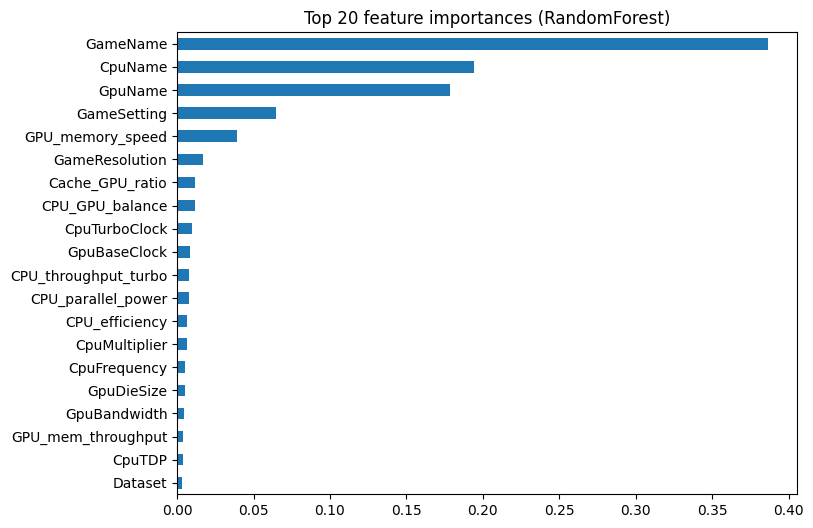

In [ ]:
rf = RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

feat_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nTop 20 features by tree importance:")
print(feat_imp.head(20))

# plot top 20
plt.figure(figsize=(8,6))
feat_imp.head(20).sort_values().plot(kind="barh")
plt.title("Top 20 feature importances (RandomForest)")
plt.show()



In [ ]:
top_k = 20
selected_by_topk = feat_imp.head(top_k).index.tolist()

# choose which selection to apply:
selected_features = selected_by_topk
# ---- 5) Shrink train/val/test in-place to keep only selected features + targets
keep_cols = selected_features + [c for c in ["FPS", "FPS_yj"] if c in train_encoded.columns]

train_encoded = train_encoded[keep_cols].copy()
val_encoded = val_encoded[keep_cols].copy()
test_encoded = test_encoded[keep_cols].copy()

print("\nDone. New shapes (train/val/test):", train_encoded.shape, val_encoded.shape, test_encoded.shape)
print("Kept features:", selected_features)


Done. New shapes (train/val/test): (191624, 22) (114975, 22) (76650, 22)
Kept features: ['GameName', 'CpuName', 'GpuName', 'GameSetting', 'GPU_memory_speed', 'GameResolution', 'Cache_GPU_ratio', 'CPU_GPU_balance', 'CpuTurboClock', 'GpuBaseClock', 'CPU_throughput_turbo', 'CPU_parallel_power', 'CPU_efficiency', 'CpuMultiplier', 'CpuFrequency', 'GpuDieSize', 'GpuBandwidth', 'GPU_mem_throughput', 'CpuTDP', 'Dataset']


In [ ]:
# choose target column (use transformed target for training)
y_col = "FPS_yj"   # change to "FPS" if you want to operate on original scale instead

# Prepare X, y from existing splits
drop_targets = [c for c in ["FPS", "FPS_yj"] if c in train_data.columns]
X_train = train_encoded.drop(columns=drop_targets)
y_train = train_encoded[y_col]

X_val = val_encoded.drop(columns=drop_targets)
y_val = val_encoded[y_col]

X_test = test_encoded.drop(columns=drop_targets)
y_test = test_encoded[y_col]


In [ ]:
y_train

239244   -0.971097
288979    1.487369
203188   -0.255155
22891    -0.778572
45769    -1.186076
            ...   
259178    0.104452
365838    0.647968
131932    1.629983
146867    0.223059
121958   -1.720975
Name: FPS_yj, Length: 191624, dtype: float64

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

# Optional libraries
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    mae = mean_absolute_error(y_val, preds)
    r2 = r2_score(y_val, preds)
    return {"Model": model_name, "RMSE": rmse, "MAE": mae, "R2": r2}

# Candidate models
models = [
    ("ElasticNet", ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)),
    ("RandomForest", RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)),
    ("HistGBM", HistGradientBoostingRegressor(max_iter=300, random_state=42)),
    ("XGBoost", XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6,
                             subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1)),
    ("LightGBM", LGBMRegressor(n_estimators=300, learning_rate=0.05,
                               num_leaves=31, random_state=42, n_jobs=-1)),
    ("CatBoost", CatBoostRegressor(iterations=300, learning_rate=0.05,
                                   depth=6, random_state=42, verbose=0))
]

results = []
for name, model in models:
    try:
        res = evaluate_model(model, X_train, y_train, X_val, y_val, name)
        results.append(res)
    except Exception as e:
        print(f"⚠️ Skipping {name} due to error: {e}")

# Compare results
results_df = pd.DataFrame(results).sort_values(by="RMSE")
print(results_df)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.060e+02, tolerance: 1.919e+01
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import VotingRegressor, StackingRegressor

# ---------------- Ensembling ----------------
# 1. Voting Ensemble (simple average of all base models)
voting_ensemble = VotingRegressor(estimators=models)

# 2. Stacking Ensemble (meta-learner learns best combination of base models)
stacking_ensemble = StackingRegressor(
    estimators=models,
    final_estimator=Ridge(alpha=1.0),  # meta-learner
    n_jobs=-1
)

ensemble_models = [
    ("VotingEnsemble", voting_ensemble),
    ("StackingEnsemble", stacking_ensemble)
]

for name, model in ensemble_models:
    try:
        res = evaluate_model(model, X_train, y_train, X_val, y_val, name)
        results.append(res)
    except Exception as e:
        print(f"⚠️ Skipping {name} due to error: {e}")

# ---------------- Compare All Results ----------------
results_df = pd.DataFrame(results).sort_values(by="RMSE")
print(results_df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020680 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1842
[LightGBM] [Info] Number of data points in the train set: 191624, number of used features: 20
[LightGBM] [Info] Start training from score 0.000393


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.060e+02, tolerance: 1.919e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.460e+02, tolerance: 1.538e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.964e+02, tolerance: 1.537e

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076939 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1822
[LightGBM] [Info] Number of data points in the train set: 153299, number of used features: 20
[LightGBM] [Info] Start training from score 0.000334
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in the train set: 153299, number of used features: 20
[LightGBM] [Info] Start training from score 0.000659
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.092562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1823
[LightGBM] [Info] Number of data points in the train set: 153299, number of used features: 20
[LightGBM] [Info] Start 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.095e+02, tolerance: 1.533e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1814
[LightGBM] [Info] Number of data points in the train set: 153300, number of used features: 20
[LightGBM] [Info] Start training from score 0.000000
              Model      RMSE       MAE        R2
2           HistGBM  0.553913  0.380270  0.693544
4          LightGBM  0.553948  0.380284  0.693505
6    VotingEnsemble  0.557947  0.384635  0.689064
5          CatBoost  0.558874  0.385766  0.688031
7  StackingEnsemble  0.560919  0.387716  0.685744
1      RandomForest  0.571636  0.393054  0.673620
0        ElasticNet  0.629795  0.453707  0.603829
3           XGBoost  0.634030  0.450656  0.598483


In [ ]:
# ---------------- Evaluate All Models on Test Data ----------------
test_results = []

# Evaluate base models again (already trained in results loop, but we re-fit on full train here)
for name, model in models + ensemble_models:
    try:
        # Train on full training data
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        rmse = np.sqrt(mean_squared_error(y_test, preds))
        mae = mean_absolute_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        test_results.append({"Model": name, "RMSE": rmse, "MAE": mae, "R2": r2})
    except Exception as e:
        print(f"⚠️ Skipping {name} on test data due to error: {e}")

# Compare results
test_results_df = pd.DataFrame(test_results).sort_values(by="RMSE")
print("\n📊 Final Test Performance:\n", test_results_df)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.060e+02, tolerance: 1.919e+01
  model = cd_fast.enet_coordinate_descent(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1842
[LightGBM] [Info] Number of data points in the train set: 191624, number of used features: 20
[LightGBM] [Info] Start training from score 0.000393


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.060e+02, tolerance: 1.919e+01
  model = cd_fast.enet_coordinate_descent(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1842
[LightGBM] [Info] Number of data points in the train set: 191624, number of used features: 20
[LightGBM] [Info] Start training from score 0.000393


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.060e+02, tolerance: 1.919e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.540e+02, tolerance: 1.536e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.964e+02, tolerance: 1.537e

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in the train set: 153299, number of used features: 20
[LightGBM] [Info] Start training from score 0.000659
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1822
[LightGBM] [Info] Number of data points in the train set: 153299, number of used features: 20
[LightGBM] [Info] Start training from score 0.000334
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno